In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom
from infomap import Infomap
from collections import Counter

## 1. Create a Directed graph.

In [2]:
graph_dir = nx.read_edgelist("connections.txt", create_using=nx.DiGraph(directed=True),nodetype = int)

## 2. Show which nodes are bridges.

In [3]:
graph_undir = nx.read_edgelist("connections.txt", create_using=nx.Graph(),nodetype = int)

In [4]:
bridges_list = list(nx.bridges(graph_undir))

## 3. Show the density of the graph. Comment about your findings

In [5]:
density = nx.density(graph_dir)

## 4. Show which nodes have the highest and lowest number of connections.

In [6]:
deg = []
for i in graph_dir:
    deg.append((i,graph_dir.degree[i]))

In [7]:
deg1 = []
for i in graph_dir:
    deg1.append(graph_dir.degree[i])

In [8]:
print(F"""Maximum degree: {deg1.index(max(deg1))} 
Minimum degree = {deg1.index(min(deg1))}""")

Maximum degree: 107 
Minimum degree = 11


In [9]:
print( f" Maximum and Minimum # of connectivities: {deg[107], deg[11]}") 

 Maximum and Minimum # of connectivities: ((107, 1045), (11, 1))


## 5. Show which nodes have the highest incoming and outgoing connections.

In [10]:
incoming = []
for i in graph_dir:
    incoming.append((i,graph_dir.in_degree[i]))
    
incoming_ind = []
for i in graph_dir:
    incoming_ind.append(graph_dir.in_degree[i])

In [11]:
print(incoming_ind.index(max(incoming_ind)),incoming_ind.index(min(incoming_ind))) 

1373 0


In [12]:
print(f"Highest outgoing connectivities {incoming[1373]}")
print(f"Lowest outgoing connectivities {incoming[0]}")

Highest outgoing connectivities (1888, 251)
Lowest outgoing connectivities (0, 0)


In [13]:
outgoing = []
for i in graph_dir:
    outgoing.append([i,graph_dir.out_degree[i]])
    
outgoing_ind = []
for i in graph_dir:
    outgoing_ind.append(graph_dir.out_degree[i])

In [14]:
print(outgoing_ind.index(max(outgoing_ind)),outgoing_ind.index(min(outgoing_ind))) 

107 11


In [15]:
print(f"Highest outgoing connectivities {outgoing[107]}")
print(f"Lowest outgoing connectivities {outgoing[11]}")

Highest outgoing connectivities [107, 1043]
Lowest outgoing connectivities [11, 0]


## 6. Show which nodes have the highest closeness, betweenness, and eigenvector

In [16]:
closeness = nx.closeness_centrality(graph_dir).items()
top_close = sorted(closeness, key=lambda pair: pair[1],reverse=True)[0:3]
top_close = [i[0] for i in top_close]
print(f"These are the top 3 nodes with the highest closeness {top_close}")

These are the top 3 nodes with the highest closeness [2642, 2649, 2629]


In [17]:
betweenness = nx.betweenness_centrality(graph_dir).items()
top_between = sorted(betweenness, key=lambda pair: pair[1],reverse=True)[0:3]
top_between = [i[0] for i in top_between]
print(f"These are the top 3 nodes with the highest betweenness {top_between}")

These are the top 3 nodes with the highest betweenness [1684, 1912, 1718]


In [18]:
eigenvector = nx.eigenvector_centrality(graph_dir, max_iter= 500).items()
top_eigh = sorted(eigenvector, key=lambda pair: pair[1],reverse=True)[0:3]
top_eigh = [i[0] for i in top_eigh]
print(f"These are the top 3 nodes with the highest eigenvector {top_eigh}")

These are the top 3 nodes with the highest eigenvector [2655, 2654, 2646]


## 7. Implement a community detection algorithm on the directed graph and show how many communities were created.

In [23]:
communities = sorted(nxcom.greedy_modularity_communities(graph_dir), key=len, reverse=True)
print(f"The Graph has {len(communities)} communities.")

The Graph has 11 communities.


In [24]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1
            
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]["community"] == G.nodes[w]["community"]:
            G.edges[v, w]["community"] = G.nodes[v]["community"]
        else:
            G.edges[v, w]["community"] = 0
            
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [25]:
set_node_community(graph_dir, communities)
set_edge_community(graph_dir)
node_color = [get_color(graph_dir.nodes[v]['community']) for v in graph_dir.nodes]

external = [(v, w) for v, w in graph_dir.edges if graph_dir.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in graph_dir.edges if graph_dir.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

In [26]:
com = []
for i in communities:
    com.append(len(i))
    
com

[1001, 753, 747, 542, 363, 314, 208, 59, 38, 8, 6]

## 8. Show the largest and the smallest community.

In [31]:
indexes_from_large_to_small = []
for i, j in enumerate(communities):
    indexes_from_large_to_small.append(i)

smallest_community = communities[len(indexes_from_large_to_small) - 1]
largest_community = communities[0]

print(f"Largest community length: {len(largest_community)} ")
print(f"Smallest community length: {len(smallest_community)}")

Largest community: 1001 
Smallest community: 6


#### The largest community has 1001 nodes, so it is kind of dominant, and can be targetted to have wider marketing effect. While the smallest community consisting of 6 nodes can be used to target for very specified makreting approaches.

## 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

In [32]:
largest1 = graph_dir.subgraph(communities[0]) 
largest2 = (graph_dir.subgraph(communities[1])) 
largest3 = (graph_dir.subgraph(communities[2]))

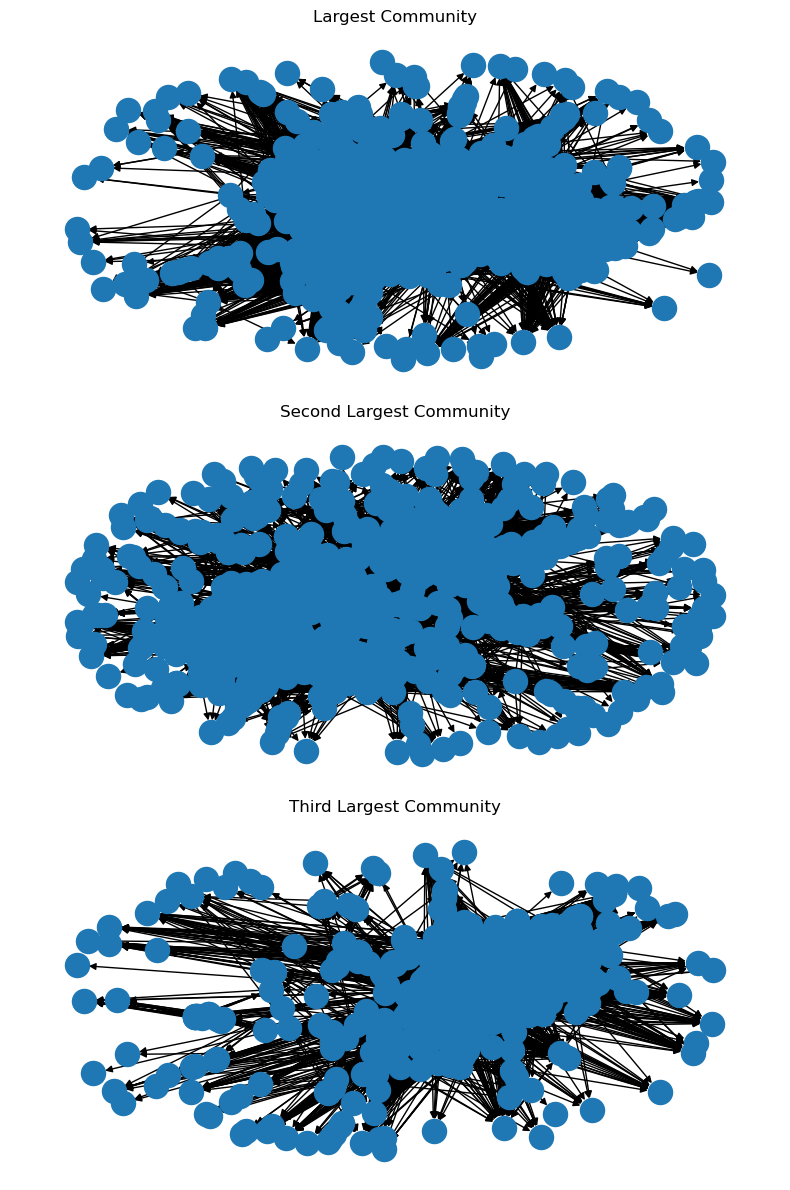

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

nx.draw(largest1, ax=axs[0])
axs[0].set_title('Largest Community')

nx.draw(largest2, ax=axs[1])
axs[1].set_title('Second Largest Community')

nx.draw(largest3, ax=axs[2])
axs[2].set_title('Third Largest Community')

plt.tight_layout()
plt.show()


In [34]:
for i in [largest1.copy(), largest2.copy(), largest3.copy()]:
    
    betweenness = nx.betweenness_centrality(i).items()
    
    top_between = sorted(betweenness, key=lambda pair: pair[1],reverse=True)[0:3]
    top_between = [i[0] for i in top_between]
    i.remove_nodes_from(top_between)
    print(f"{i}: removed top 3 nodes with maximum betweenness {top_between}")
    print(" ")
    
    closeness = nx.closeness_centrality(i).items()
    
    top_close = sorted(closeness, key=lambda pair: pair[1],reverse=True)[0:3]
    top_close = [i[0] for i in top_close]
    i.remove_nodes_from(top_close)
    print(f"{i}: removed top 3 nodes with maximum closeness {top_close}")
    print(" ")  
    
    deg = nx.degree_centrality(i).items()
    
    top_degree = sorted(deg, key=lambda pair: pair[1],reverse=True)[0:3]
    top_degree = [i[0] for i in top_degree]
    i.remove_nodes_from(top_degree)
    print(f"{i}: removed top 3 nodes with maximum degree {top_degree}")
    print(" ")
    
    eigenvector = nx.eigenvector_centrality(i, max_iter= 10000).items()
    
    top_eigh = sorted(deg, key=lambda pair: pair[1],reverse=True)[0:3]
    top_eigh = [i[0] for i in top_eigh]
    i.remove_nodes_from(top_eigh)
    print(f"{i}: removed top 3 nodes with maximum eigenvector {top_eigh}")
    print(" ")

DiGraph with 998 nodes and 26586 edges: removed top 3 nodes with maximum betweenness [1086, 1584, 1435]
 
DiGraph with 995 nodes and 26254 edges: removed top 3 nodes with maximum closeness [1881, 1888, 1885]
 
DiGraph with 992 nodes and 24807 edges: removed top 3 nodes with maximum degree [107, 1800, 1663]
 
DiGraph with 992 nodes and 24807 edges: removed top 3 nodes with maximum eigenvector [107, 1800, 1663]
 
DiGraph with 750 nodes and 6625 edges: removed top 3 nodes with maximum betweenness [3604, 3437, 698]
 
DiGraph with 747 nodes and 6436 edges: removed top 3 nodes with maximum closeness [3918, 3948, 3830]
 
DiGraph with 744 nodes and 6106 edges: removed top 3 nodes with maximum degree [686, 3596, 3545]
 
DiGraph with 744 nodes and 6106 edges: removed top 3 nodes with maximum eigenvector [686, 3596, 3545]
 
DiGraph with 744 nodes and 14179 edges: removed top 3 nodes with maximum betweenness [2946, 3117, 3078]
 
DiGraph with 741 nodes and 13909 edges: removed top 3 nodes with maxi

## 10. Draw the influencers of those top 3 communities.

In [35]:
for i in [largest1.copy(), largest2.copy(), largest3.copy()]:
    betweenness = nx.betweenness_centrality(i).items()
    top_between = sorted(betweenness, key=lambda pair: pair[1],reverse=True)[0]
    top_between = [i for i in top_between]
    
    print(f"{i}: top node with maximum betwennes {top_between}")
    
    closeness = nx.closeness_centrality(i).items()
    top_close = sorted(closeness, key=lambda pair: pair[1],reverse=True)[0]
    top_close = [i for i in top_close]
    
    top_i = top_close + top_between
    
    
    print(f"{i}: top node with max closeness {top_close}")
    color_map= ['orange' if node in top_i else 'green' for node in i.nodes]
    nx.draw(i,node_color=color_map)
    plt.show()

DiGraph with 1001 nodes and 27057 edges: top node with maximum betwennes [1086, 0.021008218231951963]
DiGraph with 1001 nodes and 27057 edges: top node with max closeness [1881, 0.3334852652259332]


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

## Hypothetical Business Context:
### Business: Telecom Company
### Objective: Increase customer acquisition and retention through targeted marketing campaigns.
### Action Plan:

#### 1. Define Budget and Cost Metrics:
Marketing Budget: $100,000 
Cost Per Action (CPA): $10 (advertisement cost per targeted action, e.g., clicking a link, signing up for a newsletter)
#### 2. Analyze Network Data:
Influential Nodes: Identify nodes with high betweenness and eigenvector centrality. These nodes often have significant influence over others in the network.
Bridges and Critical Points: Focus on bridges in the network as potential key influencers or vulnerable points where marketing efforts could have a greater impact.
Community Structures: Identify distinct communities within the network. Each community can represent a different market segment with unique characteristics.
#### 3. Targeting Strategy:
Influencer Engagement: Target individuals represented by highly central nodes for influencer marketing. Given their network position, they can influence a larger segment of the network.
Community-Specific Campaigns: Develop tailored marketing campaigns for each identified community. Different communities might have different preferences and behaviors, requiring customized approaches.
Bridge Targeting: Utilize bridge nodes to connect with otherwise isolated parts of the network, potentially unlocking new market segments.
#### 4. Budget Allocation:
Allocate the budget based on the size and potential ROI of each target group. For example:
30% on Influencer Engagement
50% on Community-Specific Campaigns
20% on Bridge Targeting Initiatives
#### 5. Campaign Execution:
Influencer Campaigns: Collaborate with influencers for product endorsements, special offers, etc.
Community Campaigns: Launch targeted ads, email marketing, and special promotions based on the characteristics of each community.
Bridge Outreach: Develop initiatives to engage bridge nodes, like exclusive offers or referral programs.
#### 6. Monitoring and Adjustment:
Track Performance: Monitor metrics like conversion rates, new customer acquisitions, and customer engagement.
Adjust Strategies: Based on performance data, adjust campaigns and budget allocations to optimize ROI.
#### 7. Follow-Up:
Conduct post-campaign analysis to evaluate the effectiveness of targeting strategies.
Use insights for future marketing initiatives and network analysis updates.